In [154]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#This will give us a nice background color
sns.set_style('whitegrid')

%matplotlib inline

In [156]:
#allows to read stock info from google or yahoo etc
from pandas_datareader.data import DataReader

In [157]:
from datetime import datetime

In [158]:
from __future__ import division

In [159]:
#Let's use Yahoo and Pandas for some stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [160]:
end = datetime.now()
# year -1 allows start date to be this year minus 1
start = datetime(end.year - 1,end.month,end.day)

In [161]:
for stock in tech_list:

    #globals takes stock ticker and making into global variable
    # Which means it is setting the stock tickers AAPL, GOOG etc, as the dataframe,
    #We now have 4 dataframes and we can mess with them.
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [162]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-28,180.619995,178.050003,179.259995,178.119995,37782100.0,175.448410
2018-03-01,179.779999,172.660004,178.539993,175.000000,48802000.0,172.375214
2018-03-02,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923
2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,174.020172


In [163]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.539246,185.790873,187.666270,187.668532,3.284116e+07,186.009968
std,22.223689,21.957437,22.089697,22.111817,1.418548e+07,21.909247
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.067497,169.825005,171.479996,171.032497,2.288832e+07,170.217468
50%,187.349998,184.845001,186.204994,185.955002,2.983850e+07,184.126984
75%,209.312500,205.632496,207.299999,207.645000,3.938092e+07,205.888016
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [164]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-02-28 to 2019-02-28
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


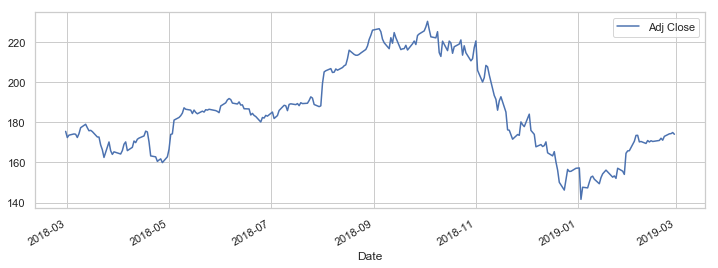

In [165]:
AAPL['Adj Close'].plot(legend=True,figsize=(12,4))
#We have mapped the Adjusted Closing Price for a year for APPLE

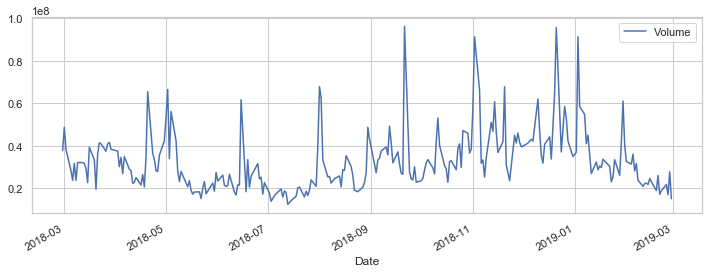

In [166]:
#Total Volume of Stock being traded over last year
AAPL['Volume'].plot(legend=True,figsize=(12,4))

In [167]:
#Moving Average for the Stock
#For more info on the moving average check out the following links:
#1.) http://www.investopedia.com/terms/m/movingaverage.asp
#2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [168]:
#Moving Average for the Stock  10 day, 20 and 50 day
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    #  doesnt working anymore : AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[column_name]= AAPL['Adj Close'].rolling(window=ma).mean()

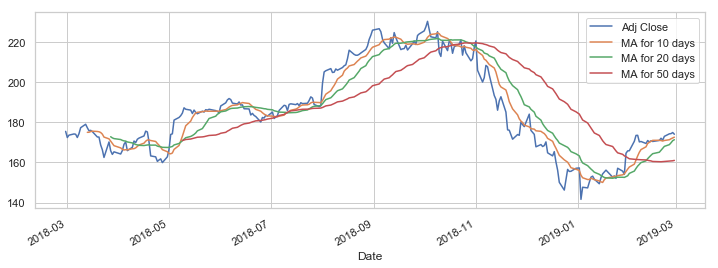

In [169]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend=True,subplots=False, figsize=(12,4))

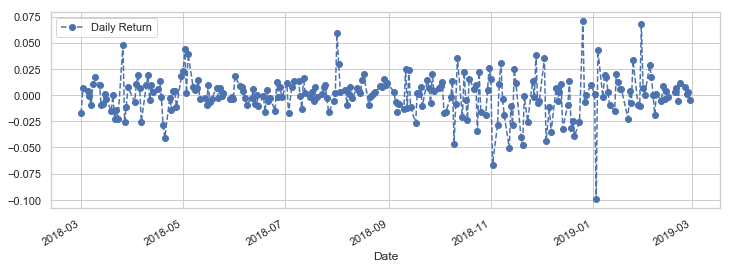

In [170]:
# Create new column daily return, percentage change of adjusted closing price column
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#This will tell you if you bought stock in beginning of that day, 
# what % you made or lost on investment
AAPL['Daily Return'].plot(figsize = (12,4),legend=True,linestyle='--',marker='o')
#We will use histograms and more statistical techniques to analyze risk on the stock
# based on this behavior

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


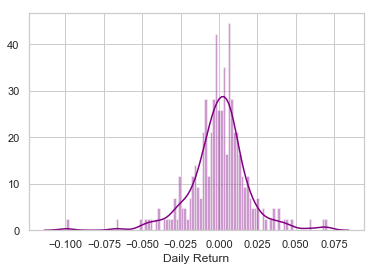

In [171]:
# Average daily return for the past year lets use a histogram / via seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

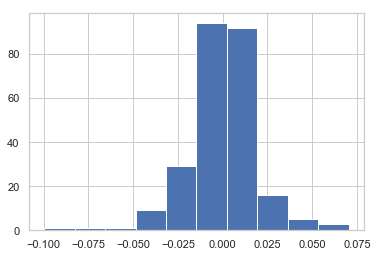

In [172]:
# Average daily return for the past year lets use a histogram / via PANDAS BUILTIN
AAPL['Daily Return'].hist()


In [173]:
# Analyze return of all the stocks on the list, build new dataframe, 
# all the adjusted closed columns for each of those dataframes
# pandas Datareader to read, passed tech list, yahoo for yahoo finance, start and end date
# specified for only adjusted closed
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [174]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-28,175.448410,1512.449951,1104.729980,92.213516
2018-03-01,172.375214,1493.449951,1069.520020,91.308777
2018-03-02,173.567078,1500.250000,1078.920044,91.505470
2018-03-05,174.167923,1523.609985,1090.930054,92.085670
2018-03-06,174.020172,1537.640015,1095.060059,91.770981


In [175]:
# Daily return for all the stocks.
tech_rets = closing_df.pct_change()

In [176]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-28,NaN,NaN,NaN,NaN
2018-03-01,-0.017516,-0.012562,-0.031872,-0.009811
2018-03-02,0.006914,0.004553,0.008789,0.002154
2018-03-05,0.003462,0.015571,0.011132,0.006341
2018-03-06,-0.000848,0.009208,0.003786,-0.003417


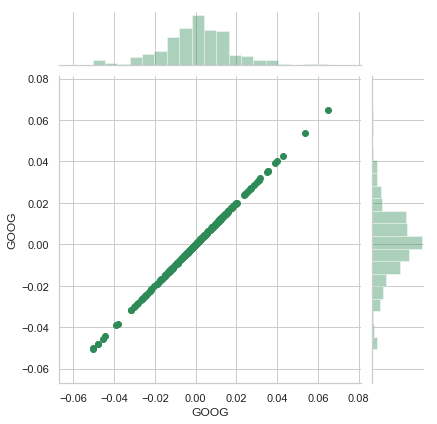

In [177]:
# What we want to do is compare google to itself here
# Joint plots shows 2 plots
# Google column to Google column above.
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color = 'seagreen')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


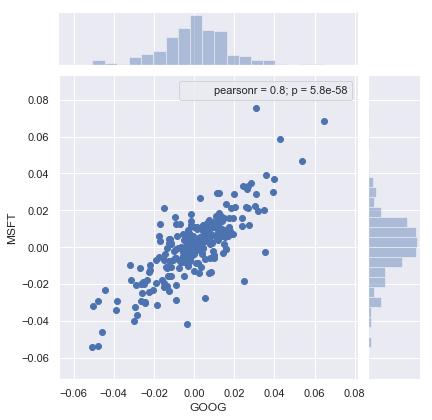

In [178]:
# Let's compare 2 different stocks to see if there are some similarities or differences
# between 2 tech stocks
sns.set(style='darkgrid',color_codes=True)
j = sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter')
j.annotate(stats.pearsonr)
plt.show()

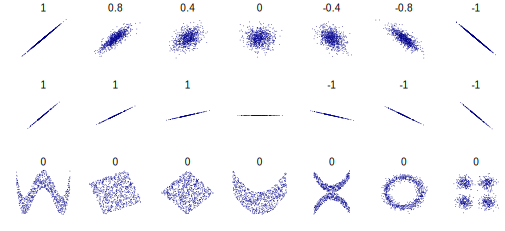

In [179]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

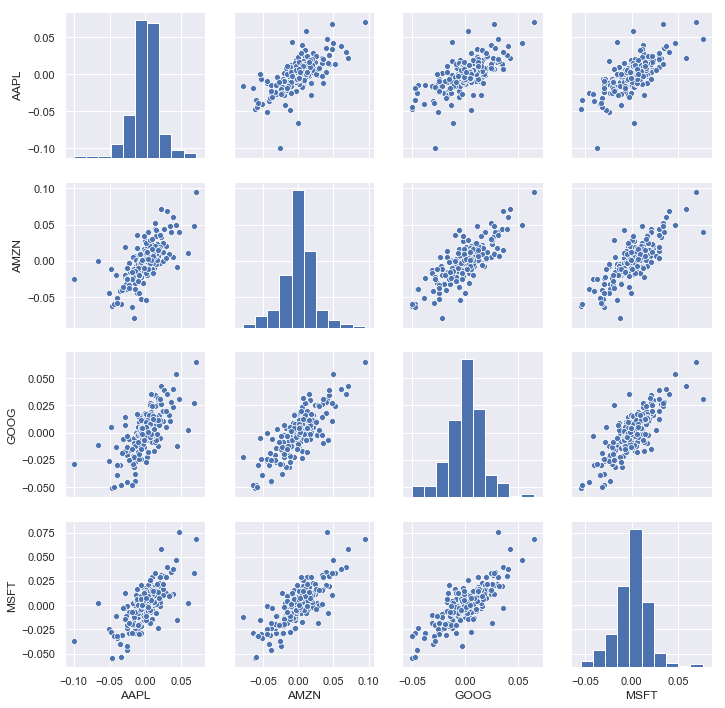

In [180]:
# Lets use this pariplot on our dataFrame techstocks to get a visual of all of them for each
sns.pairplot(tech_rets.dropna())

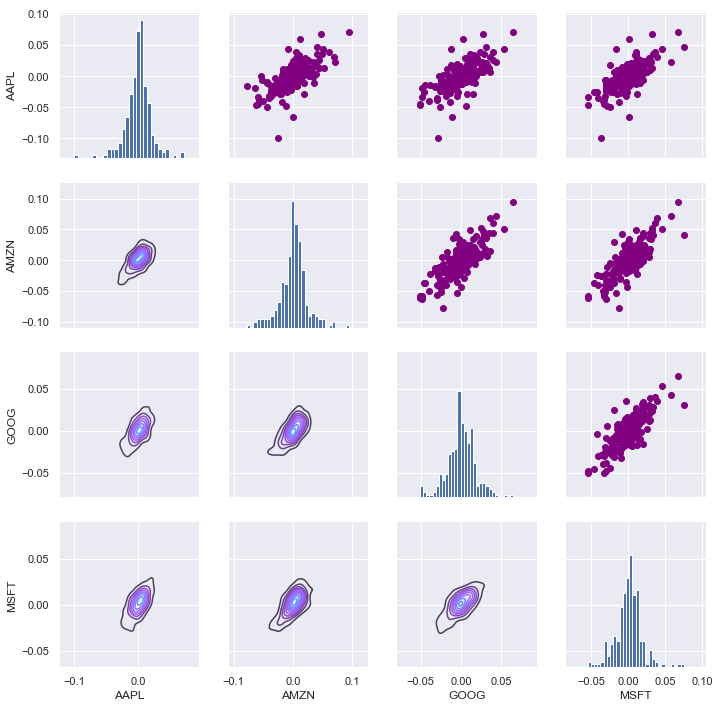

In [181]:
# Lets dive deeper and control our figure a bit more
returns_fig = sns.PairGrid(tech_rets.dropna())
#MAP UPPER TRIANGLE SCATTER
returns_fig.map_upper(plt.scatter, color='purple')

#MAP LOWER KDE PLOT
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Diagonal histogram plots
returns_fig.map_diag(plt.hist, bins=30)

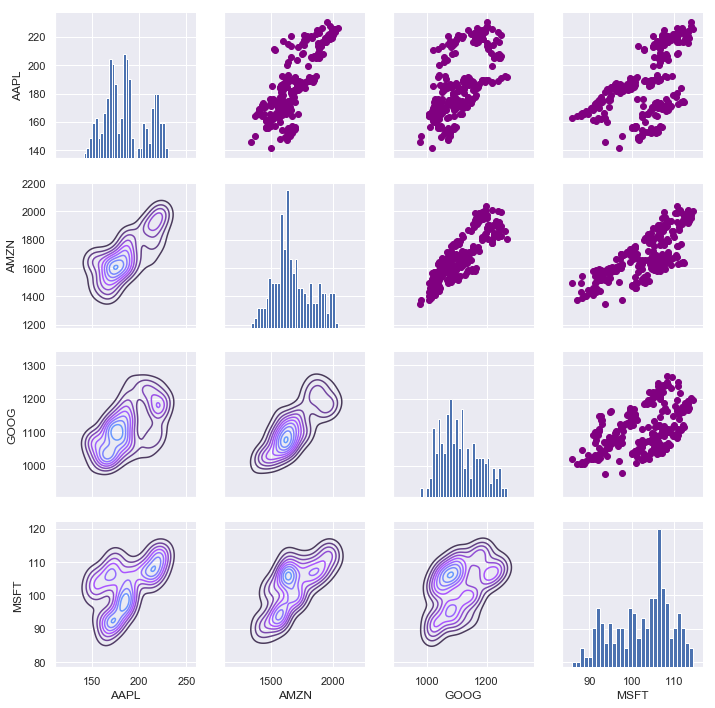

In [182]:
# We can use this same technique to get the correlations between the closing prices.
# these are the closing prices, not the daily change in prices

# Lets dive deeper and control our figure a bit more
returns_fig = sns.PairGrid(closing_df)
#MAP UPPER TRIANGLE SCATTER
returns_fig.map_upper(plt.scatter, color='purple')

#MAP LOWER KDE PLOT
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Diagonal histogram plots
returns_fig.map_diag(plt.hist, bins=30)

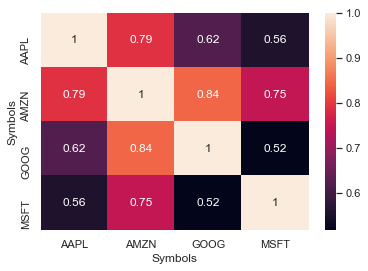

In [197]:
# Lets do a quick correlation plot for daily returns
# annot = true so we can see the values/numbers
# not working -  sns.heatmap(tech_rets.dropna())
import numpy as np

corr=closing_df.corr()

mask=np.zeros_like(corr)

mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr,annot=True)

In [198]:
# RISK ANALYSIS
# RISK VS EXPECTED RETURNS PLOT
rets = tech_rets.dropna()

In [199]:
#This will define areas of circle in plot
area= np.pi*20

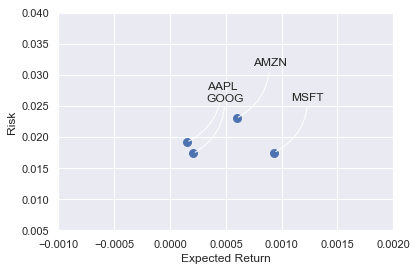

In [221]:
plt.scatter(rets.mean(),rets.std(),s = area)
#x label
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim([-.001,0.002])
plt.ylim([0.005,0.04])
#Labeling the scatter plots 
for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext=(50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    


In [225]:
#As you can see from this, you want the lowest risk and highest expected return in general when investing
# At the moment it looks like MSFT would be the best bet, according to last years data.

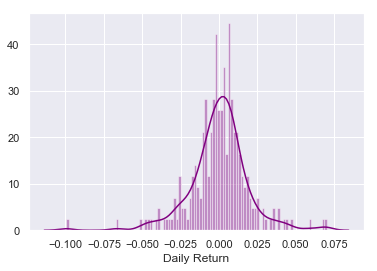

In [228]:
# Lets get the risk values, using quantile
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [229]:
# daily returns for each stock
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-01,-0.017516,-0.012562,-0.031872,-0.009811
2018-03-02,0.006914,0.004553,0.008789,0.002154
2018-03-05,0.003462,0.015571,0.011132,0.006341
2018-03-06,-0.000848,0.009208,0.003786,-0.003417
2018-03-07,-0.009283,0.004787,0.013314,0.005787


In [232]:
#95% of the time, your worst daily returns is -.02, with 95% of the time your worst daily loss.
rets['AAPL'].quantile(.05)
#This is your value at risk. everyday at worst

-0.02978997751792556

In [ ]:
# lets look at Value at risk, using MONTE CARLO Method
# Browninan Motion equation, like random walks.  Basically means you can't predict future of stock 
# Change in stock price is 

In [235]:
days = 365

dt = 1/days

#mu associated with drift
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [241]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    #array of zeros same length as days    365
    price = np.zeros(days)
    #first term
    price[0] = start_price
    
    #shock and drift arrays
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1,days):
        #Grabs from a random distribution
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        #current price = previous price + previous price * (drift + shock at time x)
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [242]:
# now lets put that function to work
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-28,1127.530029,1103.239990,1123.030029,1104.729980,1882600,1104.729980
2018-03-01,1110.119995,1067.000977,1107.869995,1069.520020,2515900,1069.520020
2018-03-02,1081.999023,1048.114990,1053.079956,1078.920044,2271600,1078.920044
2018-03-05,1097.099976,1069.000000,1075.140015,1090.930054,1202200,1090.930054
2018-03-06,1101.849976,1089.775024,1099.219971,1095.060059,1532800,1095.060059


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

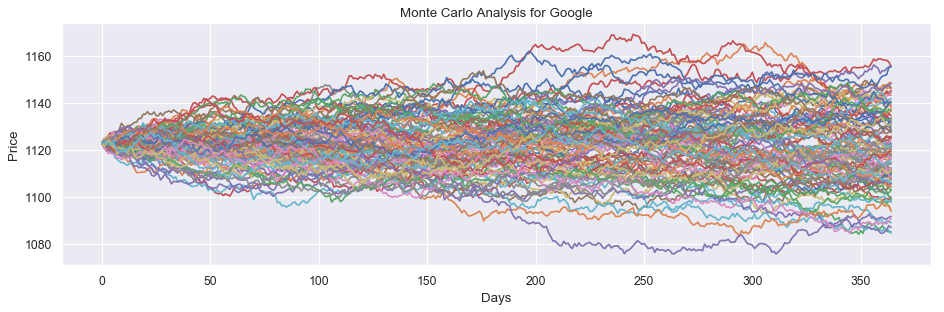

In [259]:
from matplotlib.pyplot import figure
start_price = 1123.03
figure(figsize=(14,4),dpi=80)

for run in range(100):
    
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [260]:
# So this is simulation of a years worrth of Googles Stock.
# lets create a histogram of these end results.  

In [262]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [264]:
# Basically for 10000 runs, every run that point in the simulation is going to be the end price, which is why days -1
# now that we have an array of simulations, we can do a histogram. and use quantile to determine risk for the stock

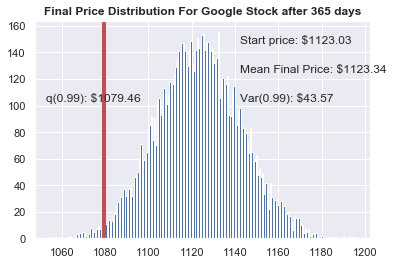

In [269]:
# it uses numpy to define q as numerical 1 percentile.
# 99% of values should fit within the output
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

#Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

#Mean Final / Ending Price
plt.figtext(0.6,0.7, "Mean Final Price: $%.2f" %simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "Var(0.99): $%.2f" % (start_price - q,))

#Display 1% Quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

#Plot a Line at the 1% quantile result
plt.axvline(x = q,linewidth=4, color='r')

#  Title
plt.title(u"Final Price Distribution For Google Stock after %s days" % days, weight = 'bold');

In [270]:
# Risk - red line
# Value at risk for each google stock is about 43.57 99% of the time that you run this MC simulations
# amount of money you will lose at most per stock for a whole year .

In [271]:
# Other questions: 
# Estimate VAR that is another stock
# Build a practice Portfolio

#   1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

#   2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

#   3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.